In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns   

import warnings
warnings.filterwarnings("ignore")

c:\Users\ARYAN\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('marketing_campaign_dataset.csv')

In [3]:
df.shape

(200000, 16)

In [4]:
df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.101,3208.83,9.20,Chicago,Spanish,191,20628,6,Health & Wellness,01-01-2021
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.213,5126.26,10.79,New York,German,1666,30894,7,Fashionistas,02-01-2021
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.028,31422.13,13.86,Los Angeles,French,1281,3091,1,Outdoor Adventurers,03-01-2021
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.021,29309.30,1.04,Miami,Mandarin,580,26798,7,Health & Wellness,04-01-2021
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.025,27895.45,13.33,Los Angeles,Mandarin,500,19683,3,Health & Wellness,05-01-2021


In [5]:
#see missing values
df.isnull().sum()

Campaign_ID         0
Company             0
Campaign_Type       0
Target_Audience     0
Duration            0
Channel_Used        0
Conversion_Rate     0
Acquisition_Cost    0
ROI                 0
Location            0
Language            0
Clicks              0
Impressions         0
Engagement_Score    0
Customer_Segment    0
Date                0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       200000 non-null  int64  
 1   Company           200000 non-null  object 
 2   Campaign_Type     200000 non-null  object 
 3   Target_Audience   200000 non-null  object 
 4   Duration          200000 non-null  object 
 5   Channel_Used      200000 non-null  object 
 6   Conversion_Rate   200000 non-null  float64
 7   Acquisition_Cost  200000 non-null  float64
 8   ROI               200000 non-null  float64
 9   Location          200000 non-null  object 
 10  Language          200000 non-null  object 
 11  Clicks            200000 non-null  int64  
 12  Impressions       200000 non-null  int64  
 13  Engagement_Score  200000 non-null  int64  
 14  Customer_Segment  200000 non-null  object 
 15  Date              200000 non-null  object 
dtypes: float64(3), int64

## Cleaning

In [7]:
#Clean Duration Column: Remove "days" and convert to integer
df['Duration'] = df['Duration'].str.replace(' days', '').astype(int)

In [8]:
#Convert Date Column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [9]:
#check duplicates
df.duplicated().sum()

0

In [10]:
df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,Innovate Industries,Email,Men 18-24,30,Google Ads,0.101,3208.83,9.20,Chicago,Spanish,191,20628,6,Health & Wellness,2021-01-01
1,2,NexGen Systems,Email,Women 35-44,60,Google Ads,0.213,5126.26,10.79,New York,German,1666,30894,7,Fashionistas,2021-01-02
2,3,Alpha Innovations,Influencer,Men 25-34,30,YouTube,0.028,31422.13,13.86,Los Angeles,French,1281,3091,1,Outdoor Adventurers,2021-01-03
3,4,DataTech Solutions,Display,All Ages,60,YouTube,0.021,29309.30,1.04,Miami,Mandarin,580,26798,7,Health & Wellness,2021-01-04
4,5,NexGen Systems,Email,Men 25-34,15,YouTube,0.025,27895.45,13.33,Los Angeles,Mandarin,500,19683,3,Health & Wellness,2021-01-05


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Campaign_ID       200000 non-null  int64         
 1   Company           200000 non-null  object        
 2   Campaign_Type     200000 non-null  object        
 3   Target_Audience   200000 non-null  object        
 4   Duration          200000 non-null  int32         
 5   Channel_Used      200000 non-null  object        
 6   Conversion_Rate   200000 non-null  float64       
 7   Acquisition_Cost  200000 non-null  float64       
 8   ROI               200000 non-null  float64       
 9   Location          200000 non-null  object        
 10  Language          200000 non-null  object        
 11  Clicks            200000 non-null  int64         
 12  Impressions       200000 non-null  int64         
 13  Engagement_Score  200000 non-null  int64         
 14  Cust

In [12]:
df.describe()

,Campaign_ID,Duration,Conversion_Rate,Acquisition_Cost,ROI,Clicks,Impressions,Engagement_Score,Date
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000
mean,100000.500000,37.503975,0.138784,18917.011768,7.685753,915.484165,18039.394495,5.494710,2021-07-01 23:35:09.600000
min,1.000000,15.000000,0.009000,1736.590000,0.860000,43.000000,452.000000,1.000000,2021-01-01 00:00:00
25%,50000.750000,30.000000,0.075000,10523.665000,4.400000,484.000000,9223.000000,3.000000,2021-04-02 00:00:00
50%,100000.500000,30.000000,0.138000,18780.705000,7.630000,908.000000,17893.000000,5.000000,2021-07-02 00:00:00
75%,150000.250000,45.000000,0.201000,26991.605000,10.850000,1334.000000,26550.000000,8.000000,2021-10-01 00:00:00
max,200000.000000,60.000000,0.323000,43010.130000,17.210000,2148.000000,43022.000000,10.000000,2021-12-31 00:00:00
std,57735.171256,16.746720,0.074708,9757.850272,3.829971,503.266782,10246.108673,2.872581,NaN


## Initial Feature Engineering

In [13]:
# Extracting month and quarter from the Date column
df['campaign_month'] = df['Date'].dt.month
df['campaign_quarter'] = df['Date'].dt.quarter

In [14]:
#Combining Campaign Type and Channels Used
df['campaign_channel_interaction'] = df['Campaign_Type'] + "_" + df['Channel_Used']


In [15]:
# Feature 1: Calculate Total Customers Converted
df['total_customers_converted'] = df['Clicks'] * df['Conversion_Rate']

# Feature 2: Calculate Total Amount Spent
df['total_amount_spent'] = df['total_customers_converted'] * df['Acquisition_Cost']

# Feature 3: Calculate Net Profit
df['net_profit'] = df['total_amount_spent'] * df['ROI']

# Preview the newly engineered features
df[['Acquisition_Cost','total_customers_converted', 'total_amount_spent', 'net_profit']].head()

,Acquisition_Cost,total_customers_converted,total_amount_spent,net_profit
0,3208.83,19.291,6.190154e+04,5.694942e+05
1,5126.26,354.858,1.819094e+06,1.962803e+07
2,31422.13,35.868,1.127049e+06,1.562090e+07
3,29309.30,12.180,3.569873e+05,3.712668e+05
4,27895.45,12.500,3.486931e+05,4.648079e+06


In [16]:
#Cost per Click (CPC)
df['CPC'] = df['total_amount_spent'] / df['Clicks']

#Click-Through Rate (CTR)
df['CTR'] = (df['Clicks'] / df['Impressions']) * 100


In [17]:
df.to_csv('marketing_campaign_dataset_cleaned.csv', index=False)

## EDA

In [18]:
df.describe()

,Campaign_ID,Duration,Conversion_Rate,Acquisition_Cost,ROI,Clicks,Impressions,Engagement_Score,Date,campaign_month,campaign_quarter,total_customers_converted,total_amount_spent,net_profit,CPC,CTR
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000,200000.000000,200000.000000,200000.000000,2.000000e+05,2.000000e+05,200000.000000,200000.000000
mean,100000.500000,37.503975,0.138784,18917.011768,7.685753,915.484165,18039.394495,5.494710,2021-07-01 23:35:09.600000,6.525480,2.509440,128.069667,2.459843e+06,1.935445e+07,2646.555134,10.726834
min,1.000000,15.000000,0.009000,1736.590000,0.860000,43.000000,452.000000,1.000000,2021-01-01 00:00:00,1.000000,1.000000,0.495000,2.364489e+03,7.486876e+03,17.758800,0.157647
25%,50000.750000,30.000000,0.075000,10523.665000,4.400000,484.000000,9223.000000,3.000000,2021-04-02 00:00:00,4.000000,2.000000,41.624750,5.692849e+05,3.316659e+06,929.257780,2.692004
50%,100000.500000,30.000000,0.138000,18780.705000,7.630000,908.000000,17893.000000,5.000000,2021-07-02 00:00:00,7.000000,3.000000,97.650000,1.482851e+06,9.521581e+06,2046.351325,5.075240
75%,150000.250000,45.000000,0.201000,26991.605000,10.850000,1334.000000,26550.000000,8.000000,2021-10-01 00:00:00,10.000000,4.000000,188.859250,3.379699e+06,2.428009e+07,3859.506757,9.837055
max,200000.000000,60.000000,0.323000,43010.130000,17.210000,2148.000000,43022.000000,10.000000,2021-12-31 00:00:00,12.000000,4.000000,653.857000,2.627625e+07,3.833470e+08,13694.428170,304.892368
std,57735.171256,16.746720,0.074708,9757.850272,3.829971,503.266782,10246.108673,2.872581,NaN,3.447598,1.116726,107.532184,2.716367e+06,2.654442e+07,2146.504012,20.037124


#### 1.Distribution Plots

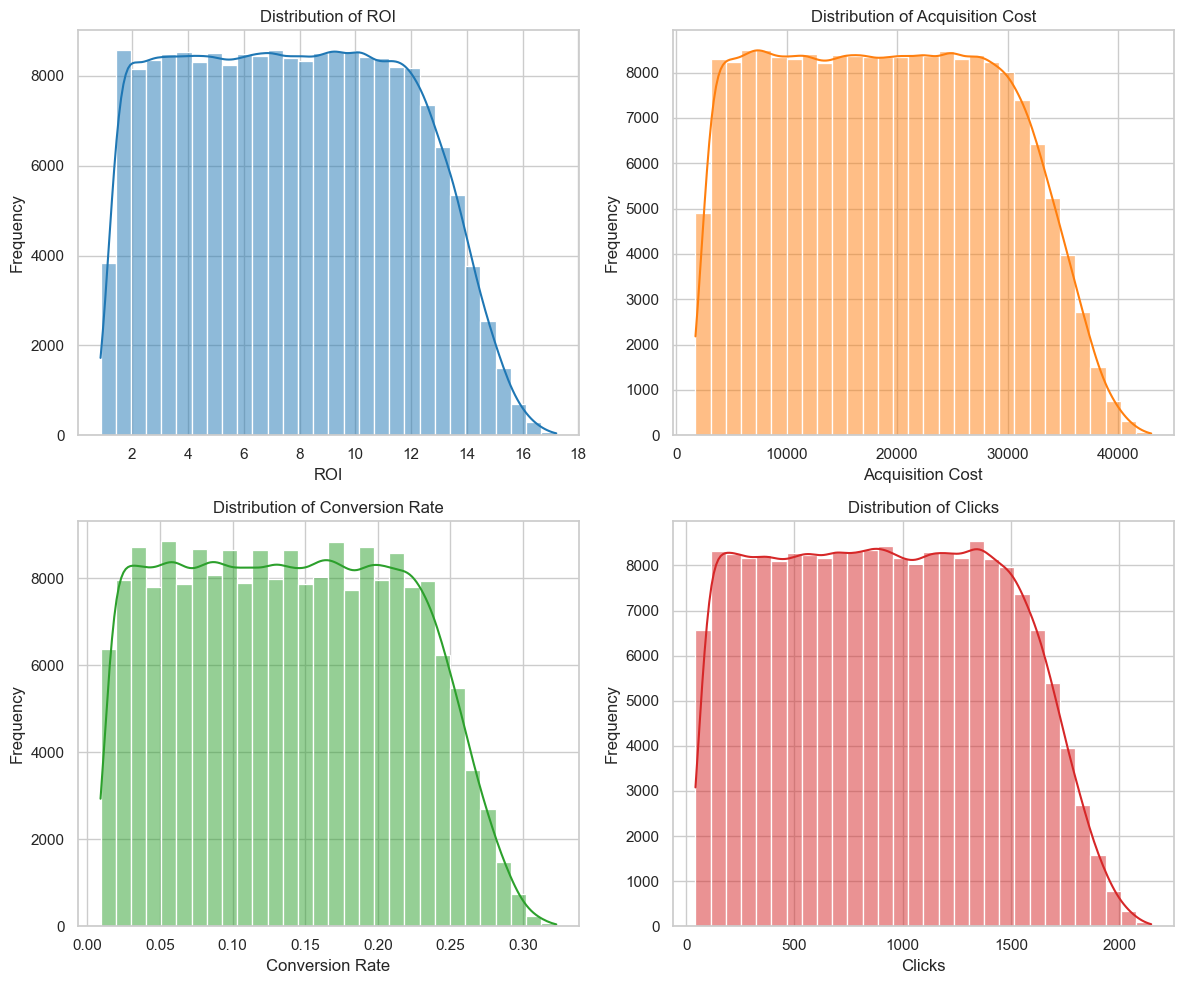

In [19]:
# Distribution Plots

# Set the style and color palette
sns.set(style='whitegrid')
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Professional color palette

# Create a 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# ROI Distribution
sns.histplot(df['ROI'], bins=30, kde=True, ax=axes[0, 0], color=colors[0])
axes[0, 0].set_title('Distribution of ROI')
axes[0, 0].set_xlabel('ROI')
axes[0, 0].set_ylabel('Frequency')

# Acquisition Cost Distribution
sns.histplot(df['Acquisition_Cost'], bins=30, kde=True, ax=axes[0, 1], color=colors[1])
axes[0, 1].set_title('Distribution of Acquisition Cost')
axes[0, 1].set_xlabel('Acquisition Cost')
axes[0, 1].set_ylabel('Frequency')

# Conversion Rate Distribution
sns.histplot(df['Conversion_Rate'], bins=30, kde=True, ax=axes[1, 0], color=colors[2])
axes[1, 0].set_title('Distribution of Conversion Rate')
axes[1, 0].set_xlabel('Conversion Rate')
axes[1, 0].set_ylabel('Frequency')

# Clicks Distribution
sns.histplot(df['Clicks'], bins=30, kde=True, ax=axes[1, 1], color=colors[3])
axes[1, 1].set_title('Distribution of Clicks')
axes[1, 1].set_xlabel('Clicks')
axes[1, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

Key Takeaways:

1. The marketing campaigns show a wide range of performance, with ROI typically between 2-16, acquisition costs mostly under $40,000, conversion rates generally below 30%, and clicks usually under 2,000. This diversity suggests opportunities for optimization across campaigns.
2. All metrics display right-skewed distributions, indicating that while most campaigns perform within an expected range, there are some high-performing outliers that could offer valuable insights for improving overall marketing effectiveness.

In [20]:
df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,...,Customer_Segment,Date,campaign_month,campaign_quarter,campaign_channel_interaction,total_customers_converted,total_amount_spent,net_profit,CPC,CTR
0,1,Innovate Industries,Email,Men 18-24,30,Google Ads,0.101,3208.83,9.20,Chicago,...,Health & Wellness,2021-01-01,1,1,Email_Google Ads,19.291,6.190154e+04,5.694942e+05,324.09183,0.925926
1,2,NexGen Systems,Email,Women 35-44,60,Google Ads,0.213,5126.26,10.79,New York,...,Fashionistas,2021-01-02,1,1,Email_Google Ads,354.858,1.819094e+06,1.962803e+07,1091.89338,5.392633
2,3,Alpha Innovations,Influencer,Men 25-34,30,YouTube,0.028,31422.13,13.86,Los Angeles,...,Outdoor Adventurers,2021-01-03,1,1,Influencer_YouTube,35.868,1.127049e+06,1.562090e+07,879.81964,41.442899
3,4,DataTech Solutions,Display,All Ages,60,YouTube,0.021,29309.30,1.04,Miami,...,Health & Wellness,2021-01-04,1,1,Display_YouTube,12.180,3.569873e+05,3.712668e+05,615.49530,2.164341
4,5,NexGen Systems,Email,Men 25-34,15,YouTube,0.025,27895.45,13.33,Los Angeles,...,Health & Wellness,2021-01-05,1,1,Email_YouTube,12.500,3.486931e+05,4.648079e+06,697.38625,2.540263


#### 2.Correlation MAtrix

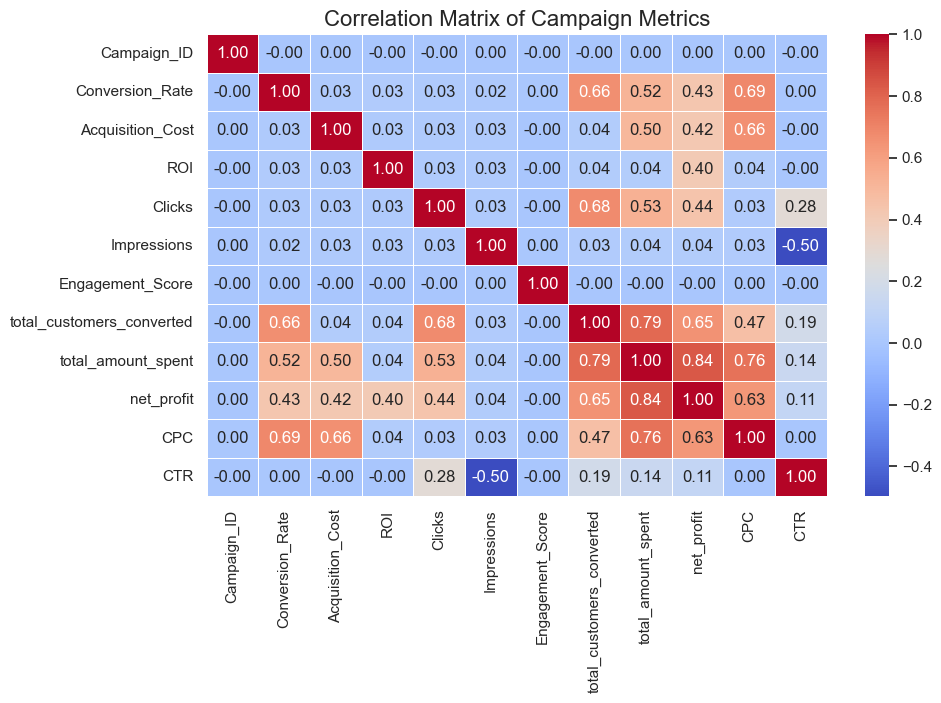

In [21]:
# Select only numerical columns for correlation analysis
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, cbar=True)

# Set the title
plt.title('Correlation Matrix of Campaign Metrics', fontsize=16)
plt.show()

Key Takeaways:

1) Spending Impact: Higher total spending correlates with more customer conversions and increased net profit, indicating effective budget allocation enhances results.
2) Ad Targeting: More impressions don't necessarily improve click-through rates, suggesting potential issues with targeting or ad relevance.

#### 3. Segment Analysis

In [22]:
from tabulate import tabulate

# Group by Campaign_Type and calculate the mean for selected metrics
comparison_table = df.groupby('Campaign_Type').agg(
    Average_Clicks=('Clicks', 'mean'),
    Average_Impressions=('Impressions', 'mean'),
    Average_Conversion_Rate=('Conversion_Rate', 'mean'),
    Average_Total_Amount_Spent=('total_amount_spent', 'mean'),
    Average_ROI=('ROI', 'mean')
).reset_index()

# Create a formatted table
table = tabulate(comparison_table, headers='keys', tablefmt='fancy_grid', showindex=False)

# Print the formatted table
print(table)


╒═════════════════╤══════════════════╤═══════════════════════╤═══════════════════════════╤══════════════════════════════╤═══════════════╕
│ Campaign_Type   │   Average_Clicks │   Average_Impressions │   Average_Conversion_Rate │   Average_Total_Amount_Spent │   Average_ROI │
╞═════════════════╪══════════════════╪═══════════════════════╪═══════════════════════════╪══════════════════════════════╪═══════════════╡
│ Display         │          822.602 │               16284.7 │                  0.12485  │                  1.76258e+06 │       6.90654 │
├─────────────────┼──────────────────┼───────────────────────┼───────────────────────────┼──────────────────────────────┼───────────────┤
│ Email           │          904.871 │               17683.6 │                  0.136692 │                  2.32945e+06 │       7.5923  │
├─────────────────┼──────────────────┼───────────────────────┼───────────────────────────┼──────────────────────────────┼───────────────┤
│ Influencer      │          982.2

In [30]:
# Group by Channel_Used and calculate the mean for selected metrics
comparison_table = df.groupby('Channel_Used').agg(
    Average_Clicks=('Clicks', 'mean'),
    Average_Impressions=('Impressions', 'mean'),
    Average_Conversion_Rate=('Conversion_Rate', 'mean'),
    Average_Total_Amount_Spent=('total_amount_spent', 'mean'),
    Average_ROI=('ROI', 'mean')
).reset_index()

# Create a formatted table
table = tabulate(comparison_table, headers='keys', tablefmt='fancy_grid', showindex=False)

# Print the formatted table
print(table)


╒════════════════╤══════════════════╤═══════════════════════╤═══════════════════════════╤══════════════════════════════╤════════════════════════════╤═══════════════╕
│ Channel_Used   │   Average_Clicks │   Average_Impressions │   Average_Conversion_Rate │   Average_Total_Amount_Spent │   Average_Acquisition_Cost │   Average_ROI │
╞════════════════╪══════════════════╪═══════════════════════╪═══════════════════════════╪══════════════════════════════╪════════════════════════════╪═══════════════╡
│ Email          │          889.638 │               17611.1 │                  0.134327 │                  2.24012e+06 │                    18379.9 │       7.46432 │
├────────────────┼──────────────────┼───────────────────────┼───────────────────────────┼──────────────────────────────┼────────────────────────────┼───────────────┤
│ Facebook       │          966.676 │               19032.5 │                  0.147431 │                  2.90136e+06 │                    20024.9 │       8.1393  │
├───

In [24]:
# Group by Target_Audience and calculate the mean for selected metrics
comparison_table = df.groupby('Target_Audience').agg(
    Average_Clicks=('Clicks', 'mean'),
    Average_Impressions=('Impressions', 'mean'),
    Average_Conversion_Rate=('Conversion_Rate', 'mean'),
    Average_Total_Amount_Spent=('total_amount_spent', 'mean'),
    Average_ROI=('ROI', 'mean')
).reset_index()

# Create a formatted table
table = tabulate(comparison_table, headers='keys', tablefmt='fancy_grid', showindex=False)

# Print the formatted table
print(table)

╒═══════════════════╤══════════════════╤═══════════════════════╤═══════════════════════════╤══════════════════════════════╤═══════════════╕
│ Target_Audience   │   Average_Clicks │   Average_Impressions │   Average_Conversion_Rate │   Average_Total_Amount_Spent │   Average_ROI │
╞═══════════════════╪══════════════════╪═══════════════════════╪═══════════════════════════╪══════════════════════════════╪═══════════════╡
│ All Ages          │          885.724 │               17524.9 │                  0.13422  │                  2.21983e+06 │       7.42799 │
├───────────────────┼──────────────────┼───────────────────────┼───────────────────────────┼──────────────────────────────┼───────────────┤
│ Men 18-24         │          904.092 │               17798.3 │                  0.136848 │                  2.35195e+06 │       7.58745 │
├───────────────────┼──────────────────┼───────────────────────┼───────────────────────────┼──────────────────────────────┼───────────────┤
│ Men 25-34         

In [25]:
# Group by Customer_Segment and calculate the mean for selected metrics
comparison_table = df.groupby('Customer_Segment').agg(
    Average_Clicks=('Clicks', 'mean'),
    Average_Impressions=('Impressions', 'mean'),
    Average_Conversion_Rate=('Conversion_Rate', 'mean'),
    Average_Total_Amount_Spent=('total_amount_spent', 'mean'),
    Average_ROI=('ROI', 'mean')
).reset_index()

# Create a formatted table
table = tabulate(comparison_table, headers='keys', tablefmt='fancy_grid', showindex=False)

# Print the formatted table
print(table)

╒═════════════════════╤══════════════════╤═══════════════════════╤═══════════════════════════╤══════════════════════════════╤═══════════════╕
│ Customer_Segment    │   Average_Clicks │   Average_Impressions │   Average_Conversion_Rate │   Average_Total_Amount_Spent │   Average_ROI │
╞═════════════════════╪══════════════════╪═══════════════════════╪═══════════════════════════╪══════════════════════════════╪═══════════════╡
│ Fashionistas        │          956.301 │               18815.7 │                  0.14505  │                  2.8129e+06  │       8.02126 │
├─────────────────────┼──────────────────┼───────────────────────┼───────────────────────────┼──────────────────────────────┼───────────────┤
│ Foodies             │          891.416 │               17501.2 │                  0.135415 │                  2.27211e+06 │       7.48451 │
├─────────────────────┼──────────────────┼───────────────────────┼───────────────────────────┼──────────────────────────────┼───────────────┤
│ Heal

Key Takeaways:

1) Campaign Type: Influencer and Social Media campaigns have higher conversion rates and ROIs than Display campaigns.
2) Channel Used: Facebook and Instagram campaigns perform best, with high CTR and ROI, while Website campaigns underperform.
3) Target Audience: Men and Women aged 25-34 have higher conversion rates, with Women 35-44 yielding the best performance.
4) Customer Segment: Fashionistas and Tech Enthusiasts respond better to marketing campaigns, showing higher CTR and ROI.

### 5. Campaign Performance Over Time

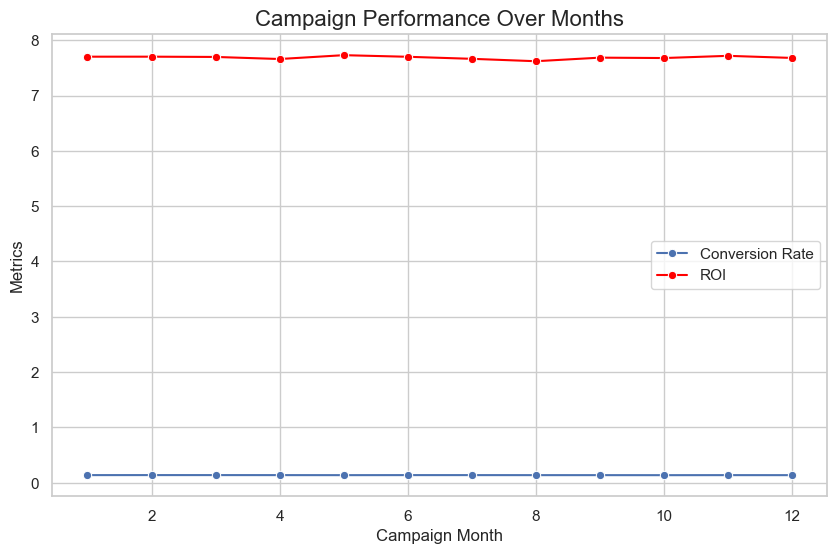

In [26]:
# Group data by campaign_month and calculate the average Conversion Rate and ROI
monthly_performance = df.groupby('campaign_month').agg({'Conversion_Rate': 'mean', 'ROI': 'mean'}).reset_index()

# Plot Conversion Rate over campaign_month
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_performance, x='campaign_month', y='Conversion_Rate', marker='o', label='Conversion Rate')
sns.lineplot(data=monthly_performance, x='campaign_month', y='ROI', marker='o', label='ROI', color='red')
plt.title('Campaign Performance Over Months', fontsize=16)
plt.xlabel('Campaign Month', fontsize=12)
plt.ylabel('Metrics', fontsize=12)
plt.legend()
plt.show()


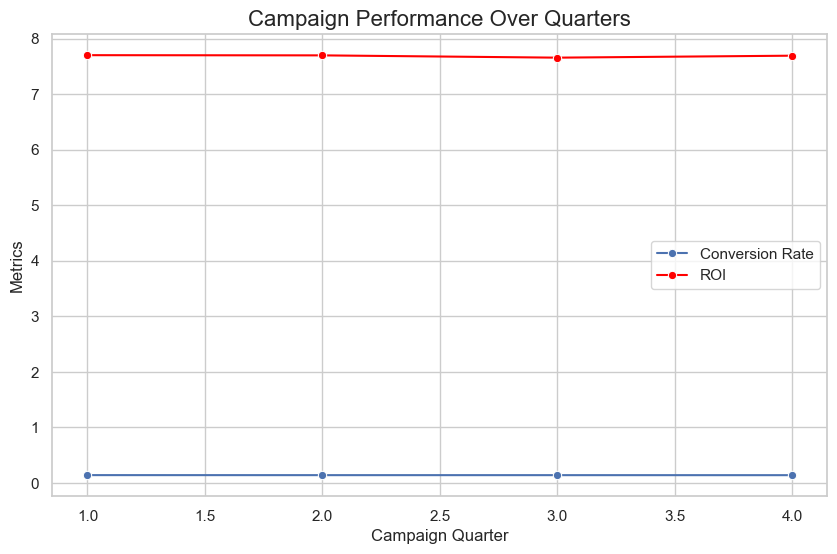

In [27]:
# Group data by campaign_quarter and calculate the average Conversion Rate and ROI
quarterly_performance = df.groupby('campaign_quarter').agg({'Conversion_Rate': 'mean', 'ROI': 'mean'}).reset_index()

# Plot Conversion Rate and ROI over campaign_quarter
plt.figure(figsize=(10, 6))
sns.lineplot(data=quarterly_performance, x='campaign_quarter', y='Conversion_Rate', marker='o', label='Conversion Rate')
sns.lineplot(data=quarterly_performance, x='campaign_quarter', y='ROI', marker='o', label='ROI', color='red')
plt.title('Campaign Performance Over Quarters', fontsize=16)
plt.xlabel('Campaign Quarter', fontsize=12)
plt.ylabel('Metrics', fontsize=12)
plt.legend()
plt.show()


### 6. Campaign_Type Across Channel_Used

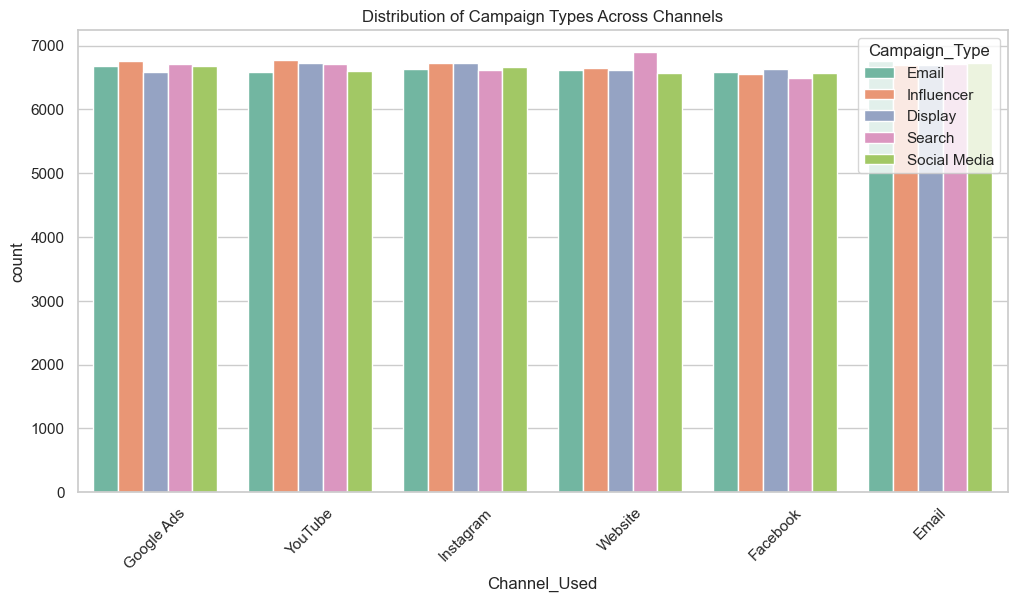

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of campaign types across channels
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Channel_Used', hue='Campaign_Type', palette='Set2')
plt.title('Distribution of Campaign Types Across Channels')
plt.xticks(rotation=45)
plt.show()


In [29]:
# Group by Channel_Used and Campaign_Type to get mean metrics
channel_campaign_performance = df.groupby(['Channel_Used', 'Campaign_Type']).agg({
    'Conversion_Rate': 'mean',
    'ROI': 'mean',
    'Acquisition_Cost': 'mean'
}).reset_index()

# Display the table to identify key patterns
channel_campaign_performance


,Channel_Used,Campaign_Type,Conversion_Rate,ROI,Acquisition_Cost
0,Email,Display,0.120667,6.706606,16672.627251
1,Email,Email,0.132726,7.412533,18097.771343
2,Email,Influencer,0.144359,7.984539,19663.802111
3,Email,Search,0.131054,7.353546,18147.490601
4,Email,Social Media,0.142829,7.864091,19318.596175
5,Facebook,Display,0.132561,7.338452,17982.784843
6,Facebook,Email,0.144618,8.036405,19754.328332
7,Facebook,Influencer,0.158310,8.672327,21313.726744
8,Facebook,Search,0.145425,8.000895,19737.179399
9,Facebook,Social Media,0.156399,8.656147,21356.607374


Key Insights:

1. Influencer Campaigns Perform the Best Across All Channels: Influencer campaigns consistently have higher Conversion Rates and ROI across different channels (e.g., Facebook, Instagram, Google Ads). However, they also tend to have the highest Acquisition Costs. This indicates that while these campaigns are more expensive, they are delivering high returns in terms of conversions and ROI.

2. Social Media Campaigns Are a Close Second: Social media campaigns follow influencer campaigns closely in terms of Conversion Rate and ROI, especially on platforms like Instagram and Facebook. Acquisition costs for social media campaigns are also quite high but generally lower than for influencer campaigns.

3. Email Campaigns Are Consistently Lower-Cost but Less Effective: While email campaigns have relatively lower Acquisition Costs, their Conversion Rates and ROI are generally lower than social media or influencer campaigns. This may suggest that email campaigns could be better suited for re-engaging existing customers rather than for new customer acquisition.

4. Display and Search Campaigns Are the Least Effective: Across all channels, display and search campaigns have lower Conversion Rates and ROI compared to influencer and social media campaigns. However, their Acquisition Costs are also lower, meaning they may still be valuable for campaigns focused on brand awareness or other top-of-funnel activities.